# CNN Feature map Visualization  

지난 실습때 훈련시킨 CNN을 통해 Feature의 의미를 보다 시각적으로 이해해 보고자 합니다.

(참고)
https://github.com/gilbutITbook/006975/blob/master/5.4-visualizing-what-convnets-learn.ipynb

In [1]:
import keras
import json
import numpy as np
from keras import models
from keras.models import model_from_json
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt #for plotting
%matplotlib inline

Using TensorFlow backend.


이전 실습에서 저장한 model의 weight를 로딩해 봅니다.

In [2]:
with open('checkpoints/cnn_model.json','r') as f:
    model_json = json.load(f)
#     print(model_json)

model = model_from_json(str(model_json))
model.load_weights('checkpoints/cnn_model.h5')
model.summary()  # 기억을 되살리기 위해서 모델 구조를 출력합니다
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
input_shape = (x_train.shape[1], x_train.shape[2], 1)
x_train_shape = (-1,) + input_shape
x_test = x_test.reshape(x_train_shape)
x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test, num_classes = 10)
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

10000/10000 [==============================] - 2s 211us/step


0.9937

학습한 모델이 feature를 어떻게 추출해 내는지 시각적으로 살펴보겠습니다.  
이를 위해, CNN 모델이 0과 1 이미지를 처리할 때의 중간층(activation map)을 layer별로 시각화해서 비교해 보는 기법을 사용해 보고자 합니다.

In [5]:
# 데이터를 다시 로딩합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
# label이 0인 이미지를 찾아보자.
y_test_0_idx = [idx for idx, val in enumerate(y_test) if val == 0]
y_test_0_idx[0:5]

[3, 10, 13, 25, 28]

In [8]:
# label이 1인 이미지를 찾아보자.
y_test_1_idx = [idx for idx, val in enumerate(y_test) if val == 1]
y_test_1_idx[0:5]

[2, 5, 14, 29, 31]

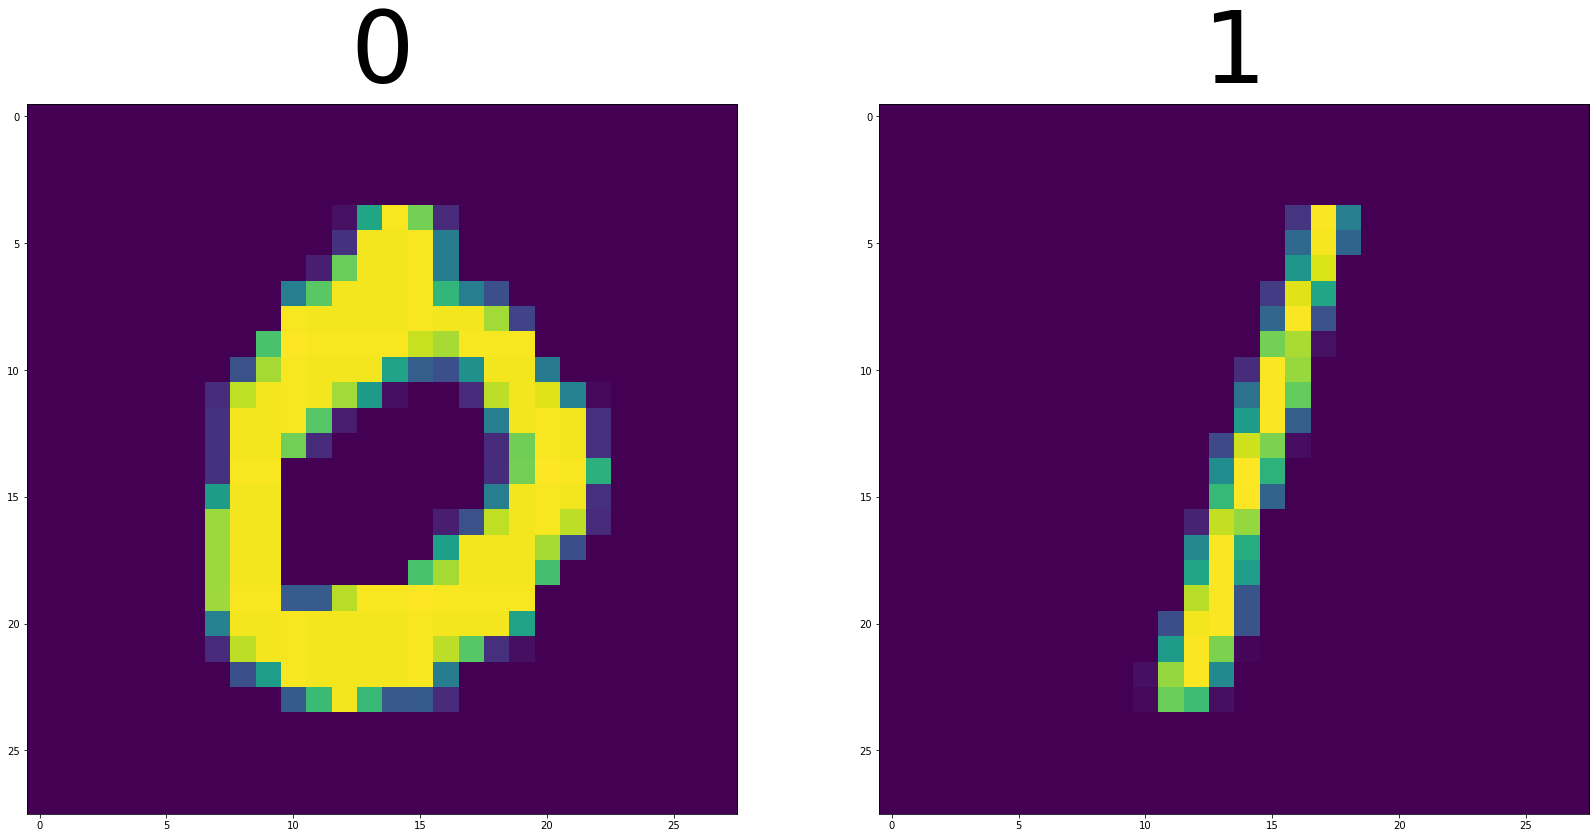

In [9]:
plt.figure(figsize=(28,28))

plt.subplot(1, 2, 1)
plt.title(y_test[y_test_0_idx[0]], fontsize=100)
plt.imshow(x_test[y_test_0_idx[0]])

plt.subplot(1, 2, 2)
plt.title(y_test[y_test_1_idx[0]], fontsize=100)
plt.imshow(x_test[y_test_1_idx[0]])

In [10]:
# 위 두 이미지를 합쳐서 모델에 한번에 입력해 보자.
x_test_input = np.stack((x_test[y_test_0_idx[0]], x_test[y_test_1_idx[0]]))
x_test_input = np.expand_dims(x_test_input, axis=3)
x_test_input.shape

(2, 28, 28, 1)

In [11]:
x_test_input = x_test_input.astype('float32') / 255

In [12]:
y_train_0_idx = [idx for idx, val in enumerate(y_train) if val == 0]
y_train_1_idx = [idx for idx, val in enumerate(y_train) if val == 1]
y_train_0_idx+y_train_1_idx

[1,
 21,
 34,
 37,
 51,
 56,
 63,
 68,
 69,
 75,
 81,
 88,
 95,
 108,
 114,
 118,
 119,
 121,
 156,
 169,
 192,
 206,
 209,
 210,
 216,
 229,
 232,
 234,
 246,
 249,
 260,
 283,
 293,
 296,
 303,
 320,
 326,
 359,
 399,
 427,
 429,
 435,
 440,
 451,
 453,
 458,
 462,
 464,
 473,
 489,
 519,
 524,
 526,
 527,
 542,
 577,
 582,
 596,
 603,
 612,
 633,
 639,
 656,
 662,
 666,
 667,
 668,
 669,
 689,
 702,
 709,
 712,
 733,
 743,
 745,
 776,
 781,
 787,
 790,
 818,
 825,
 849,
 859,
 860,
 869,
 872,
 889,
 903,
 927,
 943,
 949,
 952,
 957,
 965,
 979,
 984,
 997,
 1000,
 1015,
 1018,
 1028,
 1029,
 1040,
 1046,
 1049,
 1076,
 1078,
 1090,
 1093,
 1102,
 1107,
 1128,
 1137,
 1152,
 1168,
 1179,
 1195,
 1209,
 1268,
 1304,
 1310,
 1346,
 1349,
 1359,
 1363,
 1367,
 1368,
 1371,
 1372,
 1377,
 1386,
 1387,
 1403,
 1423,
 1443,
 1454,
 1471,
 1479,
 1489,
 1495,
 1501,
 1502,
 1512,
 1517,
 1530,
 1532,
 1571,
 1578,
 1590,
 1596,
 1600,
 1605,
 1606,
 1625,
 1626,
 1645,
 1664,
 1678,
 1682

In [13]:
y_train[y_train_0_idx+y_train_1_idx]

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [14]:
model.layers

In [15]:
# layer의 output으로만 이루어진 list를 만들어 봅시다.
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Merge:0' shape=(?, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'conv2d_4/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'dropout_2/cond/Merge:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'dense_1/Relu:0' shape=(?, 256) dtype=float32>,
 <tf.Tensor 'dropout_3/cond/Merge:0' shape=(?, 256) dtype=float32>,
 <tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 10) dtype=float32>,
 <tf.Tensor 'activation_1/Softmax:0' shape=(?, 10) dtype=float32>]

In [16]:
layer_inputs = [layer.input for layer in model.layers]
layer_inputs

[<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Merge:0' shape=(?, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'conv2d_4/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'dropout_2/cond/Merge:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'dense_1/Relu:0' shape=(?, 256) dtype=float32>,
 <tf.Tensor 'dropout_3/cond/Merge:0' shape=(?, 256) dtype=float32>,
 <tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 10) dtype=float32>]

In [17]:
# 입력에 대해 CNN의 각 레이어의 output을 전부 반환하는 모델을 만듭니다:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [18]:
# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환합니다:
activations  = activation_model.predict(x_test_input)

In [19]:
len(activations)

13

In [20]:
activations[0].shape

(2, 28, 28, 32)

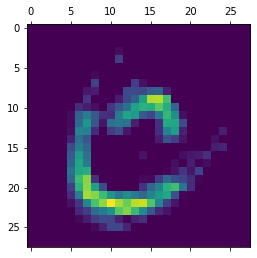

In [21]:
# 0 이미지에 대한 1번째 conv 레이어가 출력한 32번째 feature map을 출력해 봅시다.
plt.matshow(activations[0][0, :, :, 31], cmap='viridis')
plt.show()

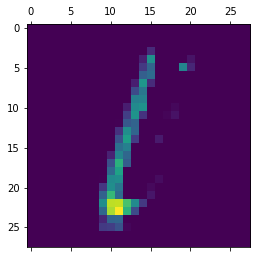

In [22]:
# 1 이미지에 대한 1번째 conv 레이어가 출력한 32번째 feature map을 출력해 봅시다.
plt.matshow(activations[0][1, :, :, 31], cmap='viridis')
plt.show()

In [23]:
def draw_activation_grid(layer_activation, layer_name, images_per_row = 16):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [24]:
layer_activation = activations[0][0]
n_features = layer_activation.shape[-1]
n_features
size = layer_activation.shape[1]
size
n_cols = n_features // 16
n_cols
display_grid = np.zeros((size * n_cols, 16 * size))
display_grid.shape

(56, 448)

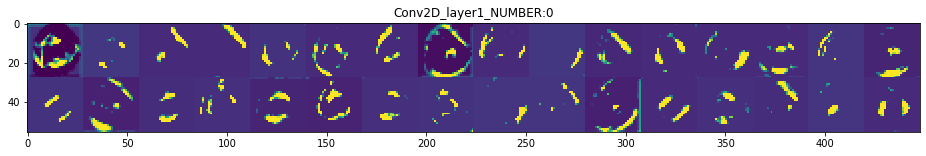

In [25]:
draw_activation_grid(activations[1][0], layer_name='Conv2D_layer1_NUMBER:0')

C:\Users\uhmpp\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


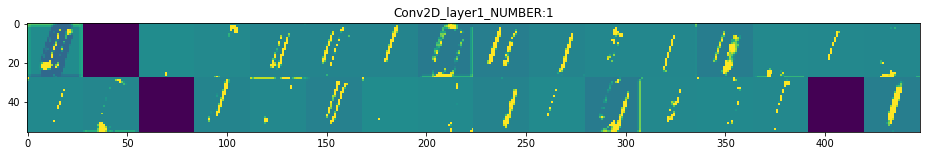

In [26]:
draw_activation_grid(activations[1][1], layer_name='Conv2D_layer1_NUMBER:1')

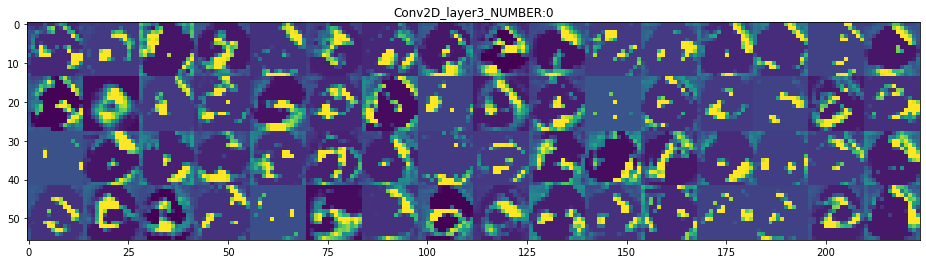

In [27]:
draw_activation_grid(activations[4][0], layer_name='Conv2D_layer3_NUMBER:0')

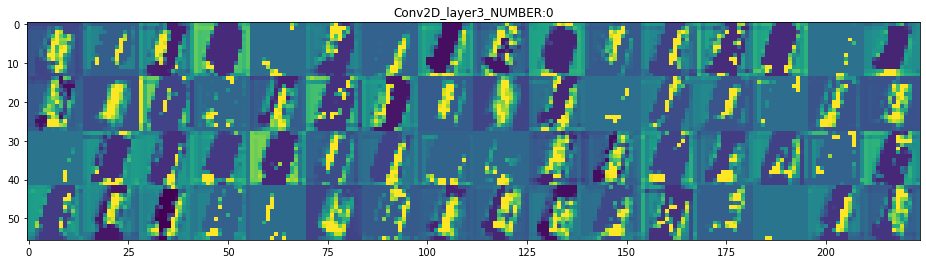

In [28]:
draw_activation_grid(activations[4][1], layer_name='Conv2D_layer3_NUMBER:0')

C:\Users\uhmpp\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


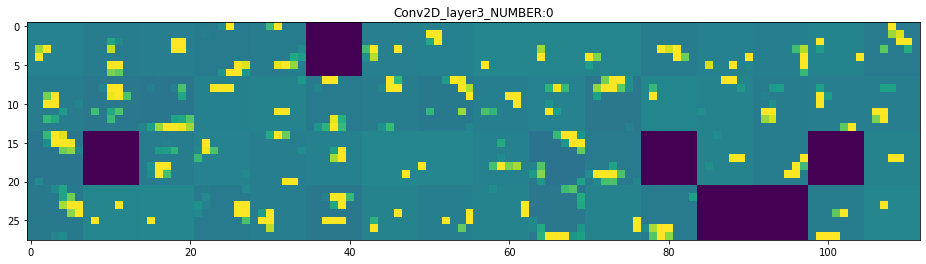

In [29]:
draw_activation_grid(activations[7][0], layer_name='Conv2D_layer3_NUMBER:0')

C:\Users\uhmpp\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


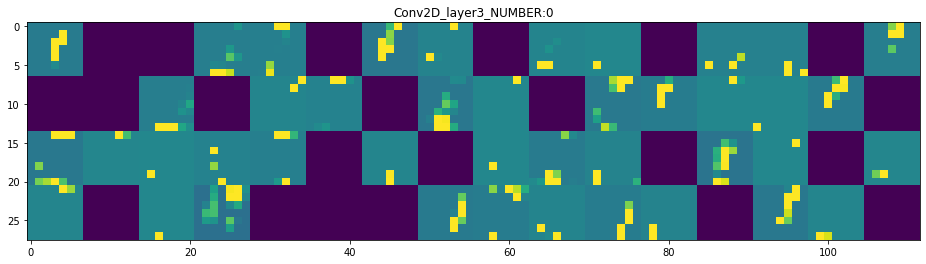

In [30]:
draw_activation_grid(activations[7][1], layer_name='Conv2D_layer3_NUMBER:0')

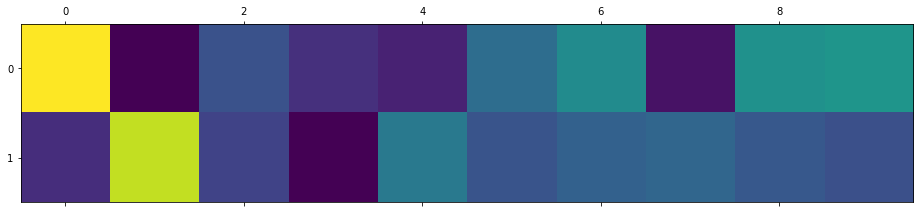

In [31]:
# softmax에 input으로 주어지는 logit vector
plt.matshow(activations[11], cmap='viridis')

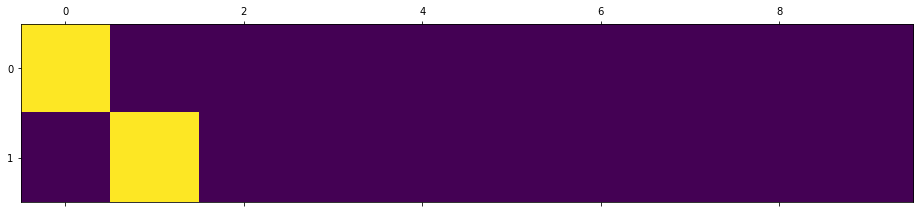

In [33]:
# softmax의 output
plt.matshow(activations[12], cmap='viridis')

In [ ]:
# softmax의 output
plt.matshow(activations[12], cmap='viridis')